# Individual Assignment. Exploratory Data Analysis





In part 1 of this assignment, we will focus on exploratory data analysis of stock prices. Keep in mind, this assignment is just meant to practice your visualization and pandas skills, it is not meant to be a robust financial analysis or be taken as financial advice.
____
** NOTE: This project is challenging and you have to look things up on your own to try to solve the tasks issued. **
____
We'll focus on bank stocks and see how they progressed throughout the [financial crisis](https://en.wikipedia.org/wiki/Financial_crisis_of_2007%E2%80%9308) all the way to early 2017.

# Part 1


## Get the Data

In this section we will learn how to use pandas to directly read data from Yahoo finance using pandas!

First we need to start with the proper imports, which we've already laid out for you here.

*Note: [You'll need to install pandas-datareader for this to work!](https://github.com/pydata/pandas-datareader) Pandas datareader allows you to [read stock information directly from the internet](http://pandas.pydata.org/pandas-docs/stable/remote_data.html) Use these links for install guidance (**pip install pandas-datareader**).*

### The Imports


In [1]:
!pip install pandas-datareader
!pip install --upgrade pandas
import pandas as pd
import numpy as np
pd.core.common.is_list_like = pd.api.types.is_list_like
from pandas_datareader import data, wb

import datetime
%matplotlib inline

Requirement already up-to-date: pandas in d:\ppppython\lib\site-packages (0.25.3)


## Data

We need to get data using pandas datareader. We will get stock information for the following banks:
*  Bank of America
* CitiGroup
* Goldman Sachs
* JPMorgan Chase
* Morgan Stanley
* Wells Fargo

** Figure out how to get the stock data from Jan 1st 2016 to Jan 1st 2017 for each of these banks. Set each bank to be a separate dataframe, with the variable name for that bank being its ticker symbol. This will involve a few steps:**
1. Use datetime to set start and end datetime objects.
2. Figure out the ticker symbol for each bank.
2. Figure out how to use datareader to grab info on the stock.

** Use [this documentation page](https://pandas-datareader.readthedocs.io/en/latest/) for hints and instructions (it should just be a matter of replacing certain values. Use google finance as a source, for example:**
    
    # Bank of America
    BAC = data.DataReader("BAC", 'google', start, end)


In [2]:
start = datetime.datetime(2016, 1, 1)
end = datetime.datetime(2017, 1, 1)

In [3]:
# Bank of America
BAC = data.DataReader("BAC", 'yahoo', start, end)

# CitiGroup
C = data.DataReader("C", 'yahoo', start, end)

# Goldman Sachs
GS = data.DataReader("GS", 'yahoo', start, end)

# JPMorgan Chase
JPM = data.DataReader("JPM", 'yahoo', start, end)

# Morgan Stanley
MS = data.DataReader("MS", 'yahoo', start, end)

# Wells Fargo
WFC = data.DataReader("WFC", 'yahoo', start, end)

In [4]:
WFC.reset_index(inplace=True)
WFC["Date"].value_counts()

2016-09-08    1
2016-03-08    1
2016-07-07    1
2016-09-07    1
2016-11-08    1
             ..
2016-08-09    1
2016-09-09    1
2016-10-10    1
2016-11-10    1
2016-08-08    1
Name: Date, Length: 253, dtype: int64

In [5]:
# Could also do this for a Panel Object
df = data.DataReader(['BAC', 'C', 'GS', 'JPM', 'MS', 'WFC'],'yahoo', start, end)


##### Add a Column_Company Name (this is filled out for you)

In [6]:
BAC["Company"]='BOA'
C["Company"]='Citi'
GS["Company"]='GoldmanSachs'
JPM["Company"]='JPMorgan'
MS["Company"]='MorganStanley'
WFC["Company"]='WellsFargo'

In [7]:
df.head
df.columns

MultiIndex([('Adj Close', 'BAC'),
            ('Adj Close',   'C'),
            ('Adj Close',  'GS'),
            ('Adj Close', 'JPM'),
            ('Adj Close',  'MS'),
            ('Adj Close', 'WFC'),
            (    'Close', 'BAC'),
            (    'Close',   'C'),
            (    'Close',  'GS'),
            (    'Close', 'JPM'),
            (    'Close',  'MS'),
            (    'Close', 'WFC'),
            (     'High', 'BAC'),
            (     'High',   'C'),
            (     'High',  'GS'),
            (     'High', 'JPM'),
            (     'High',  'MS'),
            (     'High', 'WFC'),
            (      'Low', 'BAC'),
            (      'Low',   'C'),
            (      'Low',  'GS'),
            (      'Low', 'JPM'),
            (      'Low',  'MS'),
            (      'Low', 'WFC'),
            (     'Open', 'BAC'),
            (     'Open',   'C'),
            (     'Open',  'GS'),
            (     'Open', 'JPM'),
            (     'Open',  'MS'),
            ( 

##### Draw the closing prices of BAC

Text(0.5, 1.0, 'Closing Prices of BAC')

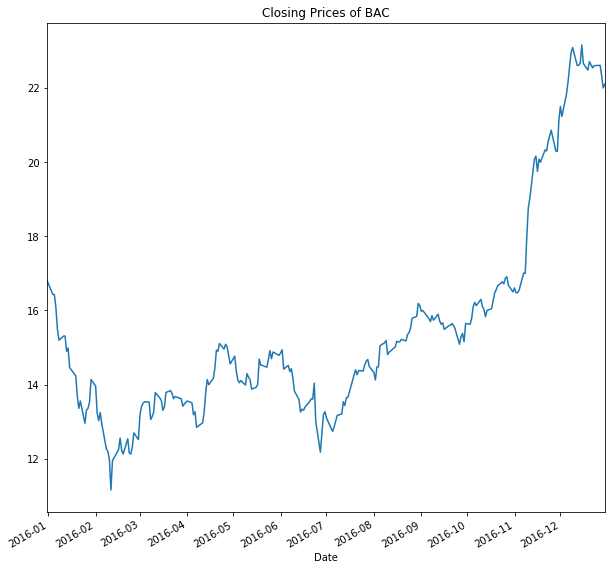

In [7]:
import matplotlib.pyplot as plt
df['Close']['BAC'].plot(figsize=(10,10),fontsize=10)
plt.title("Closing Prices of BAC")
# your code here

##### Append all the data sets

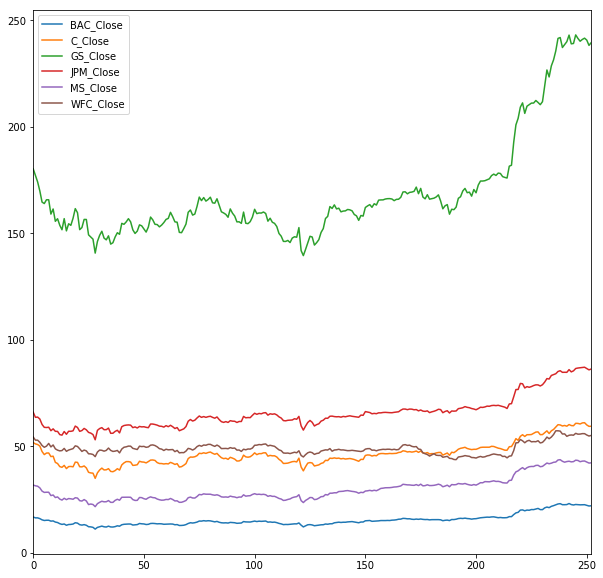

In [8]:
# your code here
close_price = pd.concat([BAC.reset_index()['Close'],C.reset_index()['Close'],GS.reset_index()['Close'],JPM.reset_index()['Close'],MS.reset_index()['Close'],WFC['Close']],axis=1)
close_price.columns=['BAC_Close','C_Close','GS_Close','JPM_Close','MS_Close','WFC_Close']
close_price.plot(figsize=(10,10),fontsize=10)

##### Derive the average closing price for each bank

In [10]:
# your code here
df = pd.concat([BAC.reset_index(), C.reset_index(), GS.reset_index(), JPM.reset_index(), MS.reset_index(), WFC])
df.groupby('Company').Close.mean()


Company
BOA               15.431905
Citi              46.386111
GoldmanSachs     169.113809
JPMorgan          65.622817
MorganStanley     29.848135
WellsFargo        48.957381
Name: Close, dtype: float64

##### Plot the average closing price for each bank using matplotlib or plotly and cufflinks


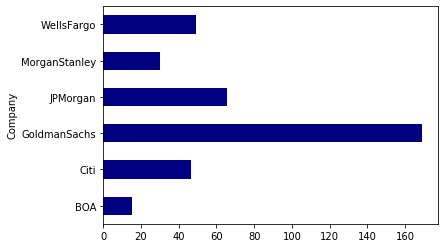

In [11]:
# your code here
df.groupby('Company').Close.mean().plot(kind = 'barh', color = 'navy')


** What is the max Close price for each bank's stock throughout the time period?**

In [12]:
# your code here
df.groupby('Company').Close.max()

Company
BOA               23.160000
Citi              61.090000
GoldmanSachs     243.089996
JPMorgan          87.129997
MorganStanley     43.730000
WellsFargo        57.290001
Name: Close, dtype: float64

** Create a new dataframe called returns. This dataframe will contain the returns for each bank's stock. returns are typically defined by:**

$$r_t = \frac{p_t - p_{t-1}}{p_{t-1}} = \frac{p_t}{p_{t-1}} - 1$$

** We can use pandas pct_change() method on the Close column to create a new dataframe representing this return value. Use .groupby().**

In [13]:
# # your code here
# df['Return'] = df['Close'].pct_change()
# df['Return'].plot(figsize=(10,10),fontsize=10)
#Use pct_change function with Close column to calculate Return for each company
Returns = df.groupby('Company').Close.pct_change() 
Returns
df['Return'] = Returns
df

,Date,High,Low,Open,Close,Volume,Adj Close,Company,Return
0,2016-01-04,16.490000,16.250000,16.450001,16.430000,114888000.0,15.373302,BOA,NaN
1,2016-01-05,16.590000,16.230000,16.520000,16.430000,66670000.0,15.373302,BOA,0.000000
2,2016-01-06,16.290001,16.020000,16.190001,16.080000,102760800.0,15.045812,BOA,-0.021303
3,2016-01-07,15.900000,15.440000,15.730000,15.500000,116255900.0,14.503113,BOA,-0.036070
4,2016-01-08,15.940000,15.160000,15.940000,15.200000,124782400.0,14.222406,BOA,-0.019355
...,...,...,...,...,...,...,...,...,...
247,2016-12-23,55.980000,55.619999,55.779999,55.959999,8313000.0,50.831436,WellsFargo,0.003767
248,2016-12-27,56.099998,55.840000,55.900002,55.950001,8893900.0,50.822350,WellsFargo,-0.000179
249,2016-12-28,56.080002,55.270000,55.980000,55.320000,10609100.0,50.250080,WellsFargo,-0.011260
250,2016-12-29,55.459999,54.480000,55.189999,54.840000,15933500.0,49.814072,WellsFargo,-0.008677


** Using this returns DataFrame, figure out on what dates each bank stock had the best and worst single day returns. Did anything significant happen that day?**

In [14]:
# your code here
r_max = df.groupby('Company').Return.max()
r_min = df.groupby('Company').Return.min()
max_date = []
min_date = []
for i in range(len(r_max)):
    a = df[df['Return']==r_max[i]]['Date'].values[0]
    max_date.append(a)
    b = df[df['Return']==r_min[i]]['Date'].values[0]
    min_date.append(b)
frame_dict = {'max':max_date,'min':min_date}
frame = pd.DataFrame(frame_dict,index=['BAC','C','GS','JPM','MS','WFC'])
frame

,max,min
BAC,2016-02-12,2016-06-24
C,2016-02-12,2016-06-24
GS,2016-11-09,2016-06-24
JPM,2016-02-12,2016-06-24
MS,2016-11-09,2016-06-24
WFC,2016-11-10,2016-06-24


** Please state here what you have noticed. Did anything significant happen in that time frame? **

** Take a look at the standard deviation of the returns, which stock would you classify as the riskiest over the entire time period? **

In [17]:
#  your code here
std = df.groupby('Company')['Return'].std()
std

Company
BOA              0.020209
Citi             0.020060
GoldmanSachs     0.016886
JPMorgan         0.015472
MorganStanley    0.020555
WellsFargo       0.015015
Name: Return, dtype: float64

** Which would you classify as the riskiest for the year 2016? **

In [16]:
# your code here
std.max()
#MorganStanley风险最大

25.150027719411604

** Create a density plot using any library you like to visualize the previous year's return for each bank **

Company
BOA              AxesSubplot(0.125,0.125;0.775x0.755)
Citi             AxesSubplot(0.125,0.125;0.775x0.755)
GoldmanSachs     AxesSubplot(0.125,0.125;0.775x0.755)
JPMorgan         AxesSubplot(0.125,0.125;0.775x0.755)
MorganStanley    AxesSubplot(0.125,0.125;0.775x0.755)
WellsFargo       AxesSubplot(0.125,0.125;0.775x0.755)
Name: Return, dtype: object

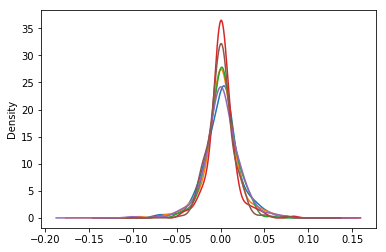

In [10]:
# your code here
import matplotlib.pyplot as plt
df.groupby('Company')['Return'].plot(kind='kde')

### Moving Averages

** Please derive the moving averages for these stocks in the year 2016. Use .rolling() in pandas to get the rolling average calculation. ** 



In [19]:
# your code here
df.groupby('Company')['Close'].rolling(window=30).mean()

Company        
BOA         0            NaN
            1            NaN
            2            NaN
            3            NaN
            4            NaN
                     ...    
WellsFargo  247    54.171000
            248    54.311667
            249    54.381667
            250    54.456667
            251    54.571000
Name: Close, Length: 1512, dtype: float64

** Plot the rolling 30 day average against the Close Price for Bank Of America's stock for the year 2016**

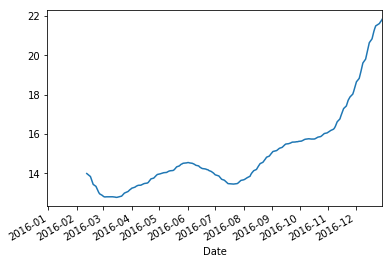

In [67]:
# your code here
BAC['Close'].rolling(window=30).mean().plot()

** Create a heatmap of the correlation between the stocks Close Price.**


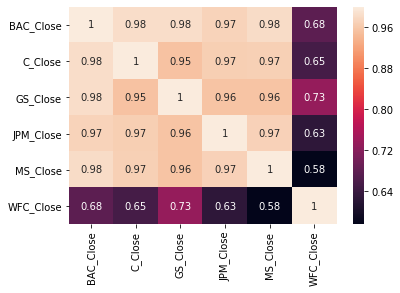

In [20]:
# your code here
import seaborn as sns
close_price = pd.concat([BAC.reset_index()['Close'],C.reset_index()['Close'],GS.reset_index()['Close'],JPM.reset_index()['Close'],MS.reset_index()['Close'],WFC['Close']],axis=1)
close_price.columns=['BAC_Close','C_Close','GS_Close','JPM_Close','MS_Close','WFC_Close']
corr = close_price.corr()
sns.heatmap(corr, annot = True)

# Part 2. 

Please generate some visualization using the crunchbase database you downloaded for the midterm. Feel free to use any plotting packages (in Python), and generate any types of figures. You may also comment on the generated figures, and explain any insights you have obtained. 

# Great Job!


In [9]:
# %load_ext sql
# %sql sqlite:///crunchbase_analysis.db
# %sql SELECT * FROM crunchbase_companies LIMIT 100
# conn = sqlite3.connect('crunchbase_analysis.db')
# conn
import sqlite3
conn = sqlite3.connect("crunchbase_analysis.db")
df1 = pd.read_sql_query("SELECT * FROM crunchbase_companies", conn)
df1.head()

,permalink,name,homepage_url,category_code,funding_total_usd,status,country_code,state_code,region,city,funding_rounds,founded_at,founded_at_clean,id
0,/company/8868,8868,http://www.8868.cn,None,NaN,operating,None,None,unknown,None,1.0,None,None,1
1,/company/21e6,2.10E+07,None,None,5050000.0,operating,USA,CA,SF Bay,San Francisco,1.0,1/1/13,2013-01-01,2
2,/company/club-domains,.Club Domains,http://dotclub.com,software,7000000.0,operating,USA,FL,Fort Lauderdale,Oakland Park,1.0,10/10/11,2011-10-10,3
3,/company/fox-networks,.Fox Networks,http://www.dotfox.com,advertising,4912394.0,closed,ARG,None,Buenos Aires,Buenos Aires,1.0,None,None,4
4,/company/a-list-games,[a]list games,http://www.alistgames.com,games_video,9300000.0,operating,None,None,unknown,None,1.0,None,None,5


D:\PPPPython\lib\site-packages\numpy\lib\histograms.py:824: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
D:\PPPPython\lib\site-packages\numpy\lib\histograms.py:825: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


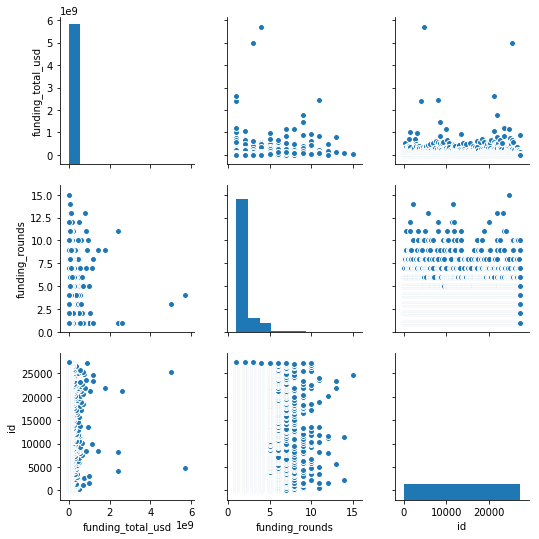

In [27]:
import seaborn as sns
sns.pairplot(df1)

In [28]:
import pandas_profiling
pandas_profiling.ProfileReport(df1)

D:\PPPPython\lib\site-packages\pandas_profiling\describe.py:392: FutureWarning: The join_axes-keyword is deprecated. Use .reindex or .reindex_like on the result to achieve the same functionality.
  variable_stats = pd.concat(ldesc, join_axes=pd.Index([names]), axis=1)


Number of variables,14
Number of observations,27327
Total Missing (%),8.5%
Total size in memory,2.9 MiB
Average record size in memory,112.0 B
Numeric,3
Categorical,11
Boolean,0
Date,0
Text (Unique),0
Rejected,0
